In [30]:
import pandas as pd   
import seaborn as sns
import matplotlib.pyplot as plt  

In [10]:
url = 'https://stepik.org/media/attachments/lesson/360344/bookings.csv'
df = pd.read_csv(url, delimiter=';')

In [11]:
df.head(5)

,Hotel,Is Canceled,Lead Time,arrival full date,Arrival Date Year,Arrival Date Month,Arrival Date Week Number,Arrival Date Day of Month,Stays in Weekend nights,Stays in week nights,stays total nights,Adults,Children,Babies,Meal,Country,Reserved Room Type,Assigned room type,customer type,Reservation Status,Reservation status_date
0,Resort Hotel,0,342,2015-07-01,2015,July,27,1,0,0,0,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015-07-01,2015,July,27,1,0,0,0,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015-07-01,2015,July,27,1,0,1,1,1,0.0,0,BB,GBR,A,C,Transient,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015-07-01,2015,July,27,1,0,1,1,1,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015-07-01,2015,July,27,1,0,2,2,2,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-03


In [12]:
df.shape

(119390, 21)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Hotel                      119390 non-null  object 
 1   Is Canceled                119390 non-null  int64  
 2   Lead Time                  119390 non-null  int64  
 3   arrival full date          119390 non-null  object 
 4   Arrival Date Year          119390 non-null  int64  
 5   Arrival Date Month         119390 non-null  object 
 6   Arrival Date Week Number   119390 non-null  int64  
 7   Arrival Date Day of Month  119390 non-null  int64  
 8   Stays in Weekend nights    119390 non-null  int64  
 9   Stays in week nights       119390 non-null  int64  
 10  stays total nights         119390 non-null  int64  
 11  Adults                     119390 non-null  int64  
 12  Children                   119386 non-null  float64
 13  Babies                     11

In [14]:
def to_lower(df):
  """приводим данные  к нижнему регистру """
  return  df.rename(columns= lambda x: x.lower())

In [15]:
def split_columns(df, symphol):
  """соединяем длинное название колонок"""
  return  df.rename(columns= lambda x: x.replace(' ', symphol))

In [16]:
#применяем  функции  модификации колонок 
df = to_lower(df)
df = split_columns(df, '_')

In [17]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_full_date,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,stays_total_nights,adults,children,babies,meal,country,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015-07-01,2015,July,27,1,0,0,0,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015-07-01,2015,July,27,1,0,0,0,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015-07-01,2015,July,27,1,0,1,1,1,0.0,0,BB,GBR,A,C,Transient,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015-07-01,2015,July,27,1,0,1,1,1,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015-07-01,2015,July,27,1,0,2,2,2,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-03


Пользователи из каких стран совершили наибольшее число успешных бронирований? Укажите топ-5.

In [18]:
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [19]:
onlyActiveBooks  = df.query("is_canceled==0")
onlyActiveBooks.groupby('country' , as_index = False )\
              .agg(cnt = ('is_canceled','count'))\
              .sort_values('cnt',  ascending = False )\
              .head(5)

,country,cnt
125,PRT,21071
57,GBR,9676
54,FRA,8481
50,ESP,6391
42,DEU,6069


На сколько ночей в среднем бронируют отели разных типов?


In [22]:
df.groupby('hotel', as_index= False)\
  .agg({'stays_total_nights': 'mean'})\
  .round(2)

,hotel,stays_total_nights
0,City Hotel,2.98
1,Resort Hotel,4.32


Иногда тип номера, полученного клиентом (assigned_room_type), отличается от изначально забронированного (reserved_room_type). Такое может произойти, например, по причине овербукинга. Сколько подобных наблюдений встретилось в датасете?

In [23]:
diffRooms = df.query('reserved_room_type !=  assigned_room_type').shape[0]
diffRooms

14917

Проанализируйте даты запланированного прибытия. 
– На какой месяц чаще всего успешно оформляли бронь в 2016? Изменился ли самый популярный месяц в 2017?
– Сгруппируйте данные по годам и проверьте, на какой месяц бронирования отеля типа City Hotel отменялись чаще всего в каждый из периодов.

In [24]:
year = df.query('arrival_date_year==2016 |  arrival_date_year ==2017')

In [25]:
count = year.groupby(['arrival_date_month', 'arrival_date_year'], as_index=False)\
             .agg(count =('is_canceled', 'count'))
  

In [28]:
count

,arrival_date_month,arrival_date_year,count
0,April,2016,5428
1,April,2017,5661
2,August,2016,5063
3,August,2017,4925
4,December,2016,3860
5,February,2016,3891
6,February,2017,4177
7,January,2016,2248
8,January,2017,3681
9,July,2016,4572


In [33]:
y2016 =  count.query('arrival_date_year == 2016 ').arrival_date_month

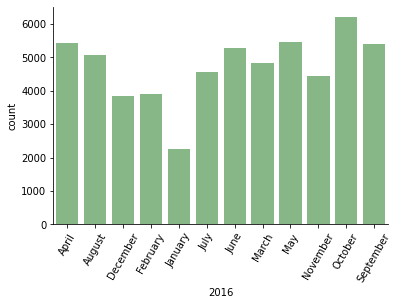

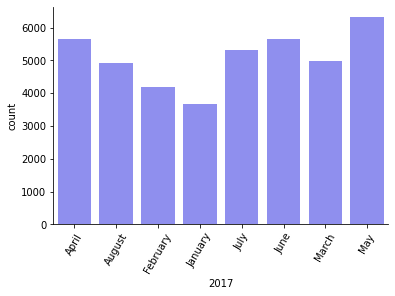

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.barplot(x = count.query('arrival_date_year == 2016 ').arrival_date_month,
                 y = count['count'],
                 data = count,
                 color = 'green',
                 alpha = 0.5)
ax.set(xlabel = '2016', ylabel = 'count')
ax.tick_params(axis = 'x', rotation=60) 
sns.despine()  # убрать часть рамки графика
plt.show()
ax = sns.barplot(x = count.query('arrival_date_year == 2017 ').arrival_date_month,
                 y = count['count'],
                 data = count,
                 color = 'blue',
                 alpha = 0.5)
ax.set(xlabel = '2017', ylabel = 'count')
ax.tick_params(axis = 'x', rotation=60) 
sns.despine()  # убрать часть рамки графика
plt.show()

In [183]:
query =  df.query('is_canceled==1 & hotel=="City Hotel"')
MY = query.groupby(['arrival_date_month','arrival_date_year'], as_index=False)\
      .agg(cnt=('is_canceled','count'))\
      .sort_values(['cnt', 'arrival_date_year'], ascending=[False,False])\
      .groupby('arrival_date_year')\
      .head(1)

In [184]:
MY

,arrival_date_month,arrival_date_year,cnt
19,May,2017,2217
23,October,2016,1947
24,September,2015,1543


In [91]:
BY = MY\
    .groupby('arrival_date_year')\
    .agg({'cnt':'sum'})

In [92]:
BY

,cnt
arrival_date_year,
2015,6004
2016,15407
2017,11691


Посмотрите на числовые характеристики трёх переменных: adults, children и babies. Какая из них имеет наибольшее среднее значение?

In [118]:
df.head(5)

,hotel,is_canceled,lead_time,arrival_full_date,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,stays_total_nights,adults,children,babies,meal,country,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015-07-01,2015,July,27,1,0,0,0,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015-07-01,2015,July,27,1,0,0,0,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015-07-01,2015,July,27,1,0,1,1,1,0.0,0,BB,GBR,A,C,Transient,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015-07-01,2015,July,27,1,0,1,1,1,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015-07-01,2015,July,27,1,0,2,2,2,0.0,0,BB,GBR,A,A,Transient,Check-Out,2015-07-03


In [122]:
df[['adults',	'children', 'babies']].mean()

adults      1.856403
children    0.103890
babies      0.007949
dtype: float64

Создайте колонку total_kids, объединив столбцы children и babies. Для отелей какого типа среднее значение переменной оказалось наибольшим?

In [123]:
df['total_kids'] = df['children'] + df['babies']

In [127]:
df.groupby('hotel')\
  .agg({'total_kids': 'mean'})\
  .round(2)

,total_kids
hotel,
City Hotel,0.10
Resort Hotel,0.14


Создайте переменную has_kids, которая принимает значение True, если клиент при бронировании указал хотя бы одного ребенка (total_kids), в противном случае – False. Далее проверьте, среди какой группы пользователей показатель оттока выше. 

В качестве ответа укажите наибольший %, округленный до 2 знаков после точки (то есть доля 0.24563 будет 24.56% и в ответ пойдёт 24.56)


In [129]:
df['total_kids']>0

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Name: total_kids, Length: 119390, dtype: bool

In [131]:
df['has_kids'] = df['total_kids'] > 0

In [166]:
kids_statistics = df.query('is_canceled == 1')\
  .groupby(['is_canceled', 'has_kids'], as_index =False)\
  .agg({'is_canceled': 'count'})\
# .groupby('has_kids')\
# .agg({'is_canceled':'sum'})

In [169]:
kids_statistics['all'] = df.query('has_kids == False').shape[0]

In [170]:
kids_statistics

,has_kids,is_canceled,all
0,False,40965,110058
1,True,3259,110058


In [172]:
kids_statistics['percent'] = round(kids_statistics['is_canceled'] /  kids_statistics['all'], 4 )*100
kids_statistics

,has_kids,is_canceled,all,percent
0,False,40965,110058,37.22
1,True,3259,110058,2.96
